# Тесты эстиматоров взаимной информации

## Преамбула

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-0__xdt95 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

matplotlib.rc('font', **font)

#### Импортирование модуля

In [4]:
import sys
sys.path.insert(0, './py')

In [5]:
import mutinfo.estimators.mutual_information as mi_estimators
from mutinfo.utils.dependent_norm import multivariate_normal_from_MI

In [6]:
global_n_jobs = 64

#### Стандартные тесты с произвольным преобразованием

In [7]:
def perform_normal_test(mi, n_samples, X_dimension, Y_dimension, X_map = None, Y_map = None, verbose = 0):
    # Генерация.
    random_variable = multivariate_normal_from_MI(X_dimension, Y_dimension, mi)
    X_Y = random_variable.rvs(n_samples)
    X = X_Y[:, 0:X_dimension]
    Y = X_Y[:, X_dimension:X_dimension + Y_dimension]
        
    # Применение преобразования.
    if not X_map is None:
        X = X_map(X)
           
    if not Y_map is None:
        Y = Y_map(Y)
            
    #if (not X_map is None) or (not Y_map is None):
    #    X_Y = np.concatenate([X, Y], axis=1)

    # Оценка энтропии.
    mi_estimator = mi_estimators.MutualInfoEstimator(Y_is_discrete = False, n_jobs = global_n_jobs)
    mi_estimator.fit(X, Y, verbose = verbose)
    
    return mi_estimator.predict(X, Y, verbose = verbose)

#### График оценки взаимной информации

## Зависимость оценки от истинного значения (непрерывный случай)

In [8]:
def perform_normal_tests_MI(MI, n_samples, X_dimension, Y_dimension, X_map = None, Y_map = None, verbose = 0):
    """
    Вычислить оценки взаимной информации для разных истинных значений
    (преобразованное нормальное распределение).
    """
    n_exps = len(MI)
    
    # Оценки взаимной информации.
    estimated_MI = []

    # Проведение тестов.
    for n_exp in range(n_exps):
        print("\nn_exp = %d/%d\n------------\n" % (n_exp + 1, n_exps))
        estimated_MI.append(perform_normal_test(MI[n_exp], n_samples, X_dimension, Y_dimension,
                                                X_map, Y_map, verbose))
        
    return estimated_MI

In [9]:
def plot_estimated_MI(MI, estimated_MI, title):
    estimated_MI_mean = np.array([estimated_MI[index][0] for index in range(len(estimated_MI))])
    estimated_MI_std  = np.array([estimated_MI[index][1] for index in range(len(estimated_MI))])
    
    fig_normal, ax_normal = plt.subplots()

    fig_normal.set_figheight(11)
    fig_normal.set_figwidth(16)

    # Сетка.
    ax_normal.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax_normal.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')

    ax_normal.set_title(title)
    ax_normal.set_xlabel("$I(X,Y)$")
    ax_normal.set_ylabel("$\\hat I(X,Y)$")
    
    ax_normal.minorticks_on()
    
    #ax_normal.set_yscale('log')
    #ax_normal.set_xscale('log')

    ax_normal.plot(MI, MI, label="$I(X,Y)$")
    ax_normal.plot(MI, estimated_MI_mean, label="$\\hat I(X,Y)$")
    ax_normal.fill_between(MI, estimated_MI_mean + estimated_MI_std, estimated_MI_mean - estimated_MI_std, alpha=0.2)

    ax_normal.legend(loc='upper left')

    ax_normal.set_xlim((0.0, None))
    ax_normal.set_ylim((0.0, None))

    plt.show();

### Глобальные параметры тестов

In [10]:
# Исследуемые значения взаимной информации.
#MI = [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0, 6.0, 8.0, 10.0]
MI = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
#MI = [0.0, 2.0, 5.0]
n_exps = len(MI)

# Число экземпляров и размерности векторов X и Y.
n_samples = 2000
X_dimension = 2
Y_dimension = 2

### Нормальный случайный вектор

In [ ]:
# Оценки взаимной информации.
estimated_MI = perform_normal_tests_MI(MI, n_samples, X_dimension, Y_dimension, verbose=10)

In [ ]:
plot_estimated_MI(MI, estimated_MI, "Нормальные векторы")

### Равномерные распределения

Применим к компонентам нормального случайного вектора их функцию распределения.

In [11]:
from scipy.special import ndtr

In [12]:
# Оценки взаимной информации.
estimated_MI = perform_normal_tests_MI(MI, n_samples, X_dimension, Y_dimension, X_map = ndtr, Y_map = ndtr,
                                      verbose=10)


n_exp = 1/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.26248025 0.26677621 0.27114248 0.27558021 0.28009057 0.28467476
 0.28933397]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27558021 0.27707554 0.27857898 0.28009057 0.28161037 0.28313842
 0.28467476]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27707554 0.27757578 0.27807692 0.27857898 0.27908193 0.2795858
 0.28009057]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'a

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 102 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 130 tasks      | elapsed:    1.2s
[Paralle

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remainin


n_exp = 2/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.26248025 0.26677621 0.27114248 0.27558021 0.28009057 0.28467476
 0.28933397]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27558021 0.27707554 0.27857898 0.28009057 0.28161037 0.28313842
 0.28467476]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27707554 0.27757578 0.27807692 0.27857898 0.27908193 0.2795858
 0.28009057]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'a

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  50 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  76 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done 106 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 132 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remainin


n_exp = 3/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27558021 0.28009057 0.28467476 0.28933397 0.29406944 0.29888241
 0.30377416]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28009057 0.28161037 0.28313842 0.28467476 0.28621943 0.28777249
 0.28933397]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28467476 0.28518872 0.28570361 0.28621943 0.28673618 0.28725387
 0.28777249]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=64)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  58 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  84 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 114 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 136 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  70 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done 100 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remainin


n_exp = 4/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27558021 0.28009057 0.28467476 0.28933397 0.29406944 0.29888241
 0.30377416]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28467476 0.28621943 0.28777249 0.28933397 0.29090392 0.2924824
 0.29406944]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28777249 0.28829204 0.28881254 0.28933397 0.28985634 0.29037966
 0.29090392]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'a

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  70 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 100 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 129 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remainin


n_exp = 5/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.27558021 0.28009057 0.28467476 0.28933397 0.29406944 0.29888241
 0.30377416]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28467476 0.28621943 0.28777249 0.28933397 0.29090392 0.2924824
 0.29406944]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28933397 0.28985634 0.29037966 0.29090392 0.29142913 0.29195529
 0.2924824 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'a

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  22 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  74 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 104 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 131 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.7s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  70 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 100 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 129 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  70 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 100 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 129 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  70 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 100 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 129 tasks      | elapsed:  


n_exp = 6/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.26248025 0.27558021 0.28933397 0.30377416 0.31893503
 0.33485256]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.28933397 0.29406944 0.29888241 0.30377416 0.30874596 0.31379914
 0.31893503]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.29406944 0.29566509 0.2972694  0.29888241 0.30050418 0.30213474
 0.30377416]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.2972694  0.2978061  0.29834377 0.29888241 0.29942202 0.29996261
 0.30050418]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remainin


n_exp = 7/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.21601854 0.22679968 0.23811888 0.25000301 0.26248025 0.27558021
 0.28933397]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.23811888 0.24201612 0.24597715 0.25000301 0.25409475 0.25825347
 0.26248025]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.24597715 0.24731185 0.24865378 0.25000301 0.25135955 0.25272345
 0.25409475]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25000301 0.25045437 0.25090655 0.25135955 0.25181336 0.25226799
 0.25272345]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 127 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  82 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 112 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 135 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 102 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 130 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.5s remainin


n_exp = 8/8
------------

Настройка оценщика для (X,Y)
Поиск по сетке:  [0.34191528 0.38753222 0.43923519 0.49783616 0.56425543 0.63953609
 0.72486039]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16128079 0.1866538  0.21601854 0.25000301 0.28933397 0.33485256
 0.38753222]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.06712085 0.07959529 0.0943881  0.11193017 0.13273243 0.1574008
 0.1866538 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1574008  0.19203269 0.2342844  0.28583248 0.34872235 0.42544948
 0.51905838]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1574008  0.16818852 0.17971559 0.19203269 0.20519395 0.21925725
 0.2342844 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1574008  0.16091755 0.16451287 0.16818852 0.17194629 0.17578802
 0.17971559]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Пои

[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:  

Оценка энтропии для Y
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remainin

Оценка энтропии для (X,Y)
Восстановлено блоков данных: 0


[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=64)]: Done 178 out of 200 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=64)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=64)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done  98 tasks      | elapsed:    0.9s
[Parallel(n_jobs=64)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=64)]: Done 157 out of 200 | elapsed:    1.6s remainin

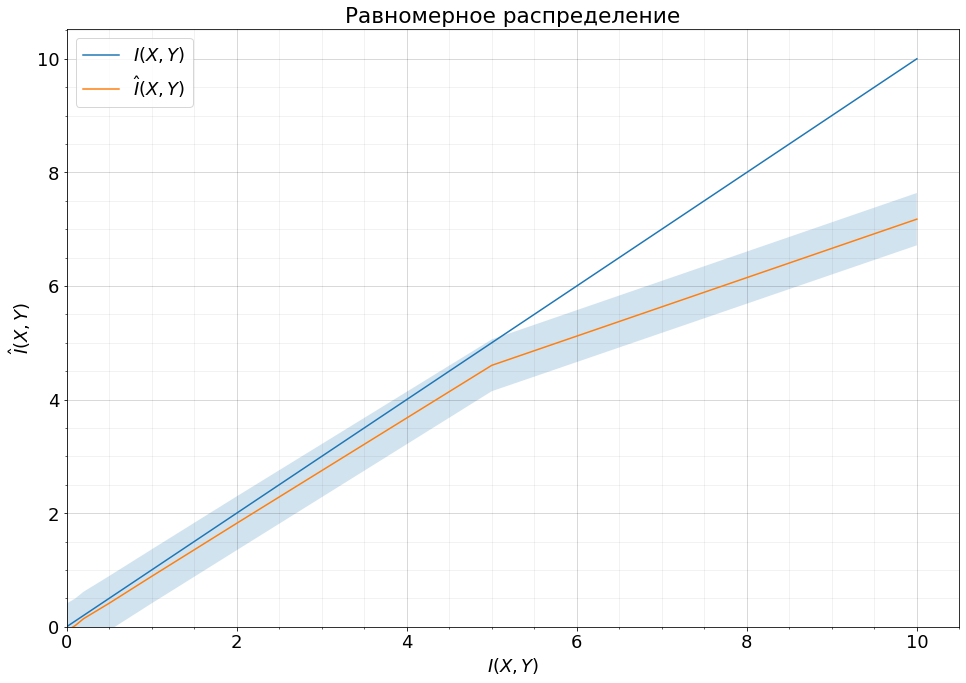

In [13]:
plot_estimated_MI(MI, estimated_MI, "Равномерное распределение")

### Полиномы

Получим равномерные распределения согласно второму пункту. Далее применим следующее преобразование:

$$
\begin{cases}
x'_1 = (x_1 + 1)^2 \\
x'_2 = x_1 + (x_2 + 1)^2 \\
\ldots \\
x'_d = x_{d-1} + (x_d + 1)^2
\end{cases}
$$

In [ ]:
def poly_mapping(X):
    """
    Преобразование нормального вектора согласно формуле выше.
    """
    
    assert len(X.shape) == 2
    
    X = ndtr(X)
    new_X = np.zeros_like(X)
    for index in range(X.shape[0]):
        new_X[index][0] = (X[index][0] + 1)**2
        for jndex in range(1, X.shape[1]):
            new_X[index][jndex] = X[index][jndex - 1] + (X[index][jndex] + 1.0)**2
            
    return new_X

In [ ]:
# Оценки взаимной информации.
estimated_MI = perform_normal_tests_MI(MI, n_samples, X_dimension, Y_dimension, X_map = poly_mapping,
                                      Y_map = poly_mapping, verbose=10)

In [ ]:
plot_estimated_MI(MI, estimated_MI, "Полиномы")

### Кольца

Получим равномерные распределения согласно второму пункту. Далее применим следующее преобразование:

$$
\begin{cases}
x' = [R \cdot x + r \cdot (1 - x)] \cdot \cos(2 \pi y) \\
y' = [R \cdot x + r \cdot (1 - x)] \cdot \sin(2 \pi y) \\
\end{cases}
$$

Здесь требуется размерность $ 2 $ у обоих векторов.

In [ ]:
r = 1.0
R = 2.0

def ring_mapping(X):
    """
    Нормальный вектор в кольцо.
    """
    
    assert len(X.shape) == 2
    assert X.shape[1] == 2
    
    X = ndtr(X)
    new_X = np.zeros_like(X)
    for index in range(X.shape[0]):
        rho = R * X[index][0] + r * (1.0 - X[index][0])
        phi = 2.0 * np.pi * X[index][1]
        
        new_X[index][0] = rho * np.cos(phi)
        new_X[index][1] = rho * np.sin(phi)
    
    return new_X

In [ ]:
def _rings_pp():
    _X_Y = multivariate_normal_from_MI(2, 2, mutual_information=10.0).rvs(10000)
    _X = _X_Y[:, 0:2]
    _Y = _X_Y[:, 2:4]
    _X = ring_mapping(_X)
    _Y = ring_mapping(_Y)
    _X_Y = np.concatenate([_X, _Y], axis=1)

    pp = sns.pairplot(pd.DataFrame(_X_Y), height = 2.0, aspect=1.6,
                      plot_kws=dict(edgecolor="k", linewidth=0.0, alpha=0.05, size=0.01, s=0.01),
                      diag_kind="kde", diag_kws=dict(shade=True))

    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle("Попарные графики", fontsize=14)
    
_rings_pp()

In [ ]:
# Оценки взаимной информации.
estimated_MI = perform_normal_tests_MI(MI, n_samples, 2, 2, X_map = ring_mapping, Y_map = ring_mapping, verbose=10)

In [ ]:
plot_estimated_MI(MI, estimated_MI, "Кольца")

## Зависимость оценки от истинного значения (дискретный случай)

In [ ]:
def perform_uniform_discrete_test(n_labels, n_samples, X_dimension, X_map = None, verbose = 0):
    # Генерация.  
    X_random_variable = sps.uniform(scale=1.0)
    X = np.zeros(shape=(n_samples, X_dimension))
    for dim in range(X_dimension):
        X[:,dim] = X_random_variable.rvs(size=n_samples)
    
    # Пусть метка генерируется исключительно по первой координате.
    Y = (np.floor(X[:,0] * n_labels)).astype(int)
        
    # Применение преобразования.
    if not X_map is None:
        X = X_map(X)
        #X_Y = np.concatenate([X, Y], axis=1)

    # Оценка энтропии.
    mi_estimator = mi_estimators.MutualInfoEstimator(Y_is_discrete = True, n_jobs = global_n_jobs)
    mi_estimator.fit(X, Y, verbose = verbose)
    
    return mi_estimator.predict(X, Y, verbose = verbose)

In [ ]:
def perform_uniform_discrete_test_MI(N_labels, n_samples, X_dimension, X_map = None, verbose = 0):
    """
    Вычислить оценки взаимной информации для разных истинных значений
    (равномерное распределение).
    """
    n_exps = len(N_labels)
    MI = np.array([np.log(N_labels[index]) for index in range(n_exps)])
    
    # Оценки взаимной информации.
    estimated_MI = []

    # Проведение тестов.
    for n_exp in range(n_exps):
        print("\nn_exp = %d/%d\n------------\n" % (n_exp + 1, n_exps))
        estimated_MI.append(perform_uniform_discrete_test(N_labels[n_exp], n_samples, X_dimension, X_map, verbose))
        
    return MI, estimated_MI

### Глобальные параметры тестов

In [ ]:
# Исследуемые значения числа меток.
N_labels = [1, 2, 4, 8, 16, 32, 64, 128]
n_exps = len(N_labels)

# Число экземпляров и размерности векторов X и Y.
X_dimension = 4

In [ ]:
MI, estimated_MI = perform_uniform_discrete_test_MI(N_labels, n_samples, X_dimension, verbose=10)

In [ ]:
plot_estimated_MI(MI, estimated_MI, "Равномерное распределение с дискретной меткой")

## Зависимость оценки от размерности (непрерывный случай)

In [ ]:
def perform_normal_tests_dim(mi, n_samples, dimensions, X_map = None, Y_map = None, verbose = 0):
    """
    Вычислить оценки взаимной информации для разных истинных значений.
    """
    n_exps = len(dimensions)
    
    # Оценки взаимной информации.
    estimated_MI = []

    # Проведение тестов.
    for n_exp in range(n_exps):
        print("\nn_exp = %d/%d\n------------\n" % (n_exp + 1, n_exps))
        estimated_MI.append(perform_normal_test(mi, n_samples, dimensions[n_exp], dimensions[n_exp],
                                                X_map, Y_map, verbose))
        
    return estimated_MI

In [ ]:
def plot_estimated_dim(dimensions, mi, estimated_MI, title):
    estimated_MI_mean = np.array([estimated_MI[index][0] for index in range(len(estimated_MI))])
    estimated_MI_std  = np.array([estimated_MI[index][1] for index in range(len(estimated_MI))])
    
    fig_normal, ax_normal = plt.subplots()

    fig_normal.set_figheight(11)
    fig_normal.set_figwidth(16)

    # Сетка.
    ax_normal.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax_normal.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')

    ax_normal.set_title(title)
    ax_normal.set_xlabel("Размерность $ X $ и $ Y $")
    ax_normal.set_ylabel("$\\hat I(X,Y)$")
    
    ax_normal.minorticks_on()
    
    #ax_normal.set_yscale('log')
    #ax_normal.set_xscale('log')

    ax_normal.plot(dimensions, np.ones_like(dimensions) * mi, label="$I(X,Y)$")
    ax_normal.plot(dimensions, estimated_MI_mean, label="$\\hat I(X,Y)$")
    ax_normal.fill_between(dimensions, estimated_MI_mean + estimated_MI_std, estimated_MI_mean - estimated_MI_std, alpha=0.2)

    ax_normal.legend(loc='upper left')

    ax_normal.set_xlim((0.0, None))
    ax_normal.set_ylim((0.0, None))

    plt.show();

### Глобальные параметры тестов

In [ ]:
dimensions = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 40]
#dimensions = [1, 2, 4, 6, 8, 12, 16, 20, 30, 40]
mi = 2.0

### Нормальный случайный вектор

In [ ]:
# Оценки взаимной информации.
estimated_MI = perform_normal_tests_dim(mi, n_samples, dimensions, verbose=10)

In [ ]:
plot_estimated_dim(dimensions, mi, estimated_MI, "Нормальные векторы")